<a href="https://colab.research.google.com/github/akanksh-a8/akanksh-a8/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5] #y_train is 1-D array now

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

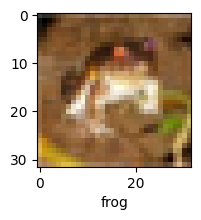

In [10]:
plot_sample(X_train,y_train,0)

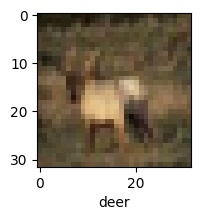

In [11]:
plot_sample(X_train,y_train,3)

NORMALIZING THE DATA
Dividing each pixel value by 255 because pixel value range from 0 to 1 for r,g and b.

In [12]:
X_train=X_train/255
X_test=X_test/255

BUILDING A SIMPLE ARTIFICIAL NEURAL NETWORK

In [33]:
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(3000,activation='relu'),layers.Dense(1000,activation='relu'),layers.Dense(10,activation='sigmoid')])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.8148 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.6240 - accuracy: 0.4234
Epoch 3/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.5424 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4823 - accuracy: 0.4767
Epoch 5/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4362 - accuracy: 0.4929


In [34]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 30ms/step - loss: 1.4852 - accuracy: 0.4723


[1.4852392673492432, 0.4722999930381775]

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.04      0.08      1000
           1       0.00      0.00      0.00      1000
           2       0.11      0.19      0.14      1000
           3       0.00      0.00      0.00      1000
           4       0.12      0.85      0.20      1000
           5       0.13      0.01      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.48      0.16      0.24      1000
           9       0.34      0.19      0.24      1000

    accuracy                           0.14     10000
   macro avg       0.18      0.14      0.09     10000
weighted avg       0.18      0.14      0.09     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')])

In [18]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6834 - accuracy: 0.7620
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6588 - accuracy: 0.7686
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6338 - accuracy: 0.7769
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6105 - accuracy: 0.7839
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5856 - accuracy: 0.7933
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5654 - accuracy: 0.8006
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.5444 - accuracy: 0.8063
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5272 - accuracy: 0.8136
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.5088 - accuracy: 0.8193
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.0793 - accuracy: 0.6836


[1.07927405834198, 0.6836000084877014]

In [24]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

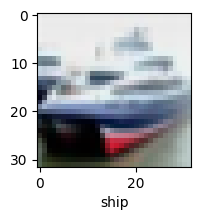

In [25]:
plot_sample(X_test,y_test,1)

In [26]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


array([[1.03119748e-06, 2.16093649e-05, 6.40161988e-06, 1.45874634e-01,
        1.82008480e-05, 8.53756249e-01, 3.04471439e-04, 8.48251602e-06,
        8.74302077e-06, 2.63402711e-07],
       [6.98212651e-04, 1.44029385e-03, 8.00803627e-06, 9.25342718e-08,
        3.24528600e-08, 8.24064844e-11, 7.31352062e-11, 2.11472007e-10,
        9.96906757e-01, 9.46711341e-04],
       [5.53144142e-02, 7.22180843e-01, 2.20763286e-05, 1.19432493e-03,
        2.56591290e-03, 1.86438920e-05, 1.08487257e-04, 2.66826223e-03,
        1.84985250e-01, 3.09415832e-02],
       [9.75944698e-01, 2.41035465e-04, 2.93864141e-04, 2.35938976e-04,
        3.84525582e-03, 1.34338975e-08, 3.10646513e-08, 3.61911567e-08,
        1.94199849e-02, 1.92057432e-05],
       [1.19681669e-11, 4.85281198e-05, 1.77686494e-02, 4.03239531e-03,
        9.68902886e-01, 3.12638469e-03, 6.11739373e-03, 2.40680009e-08,
        2.90354023e-06, 8.02129364e-07]], dtype=float32)

In [30]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 1, 0, 4]

In [31]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [32]:
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.04      0.08      1000
           1       0.00      0.00      0.00      1000
           2       0.11      0.19      0.14      1000
           3       0.00      0.00      0.00      1000
           4       0.12      0.85      0.20      1000
           5       0.13      0.01      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.48      0.16      0.24      1000
           9       0.34      0.19      0.24      1000

    accuracy                           0.14     10000
   macro avg       0.18      0.14      0.09     10000
weighted avg       0.18      0.14      0.09     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
